In [1]:
# Notebook config (run this first cell)
from pathlib import Path
import os, sys

BASE = Path(r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT")   # change if needed
DATA = BASE / "data"
IMAGES = DATA / "images"
POP = DATA / "population"
ROADS = DATA / "roads"
BOUNDARIES = DATA / "boundaries"
PROCESSED = DATA / "processed"
PATCHES = DATA / "patches"
OUTPUTS = BASE / "outputs"

# Create folders (safe)
for p in [PROCESSED, PATCHES, OUTPUTS, OUTPUTS/"maps", OUTPUTS/"charts"]:
    p.mkdir(parents=True, exist_ok=True)

print("Base:", BASE)
print("Images folder:", IMAGES)


Base: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT
Images folder: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\images


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


✅ TensorFlow/Keras imported successfully
✅ Matplotlib imported successfully
✅ Input data loaded successfully!
X_train: (2003, 64, 64, 7)
X_val: (429, 64, 64, 7)
X_test: (430, 64, 64, 7)

🔧 Creating target labels for urban growth detection...
✅ Target labels created!
y_train: (2003, 64, 64, 1)
y_val: (429, 64, 64, 1)
y_test: (430, 64, 64, 1)

📊 Data validation:
X_train range: [0.000, 1.000]
y_train unique values: [0. 1.]
✅ Input data already normalized

🏗️ Building U-Net model with input shape: (64, 64, 7)
✅ Model built successfully!
✅ Model compiled successfully!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 7)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 1)      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426,625 (1.63 MB)

 Trainable params: 426,625 (1.63 MB)

 Non-trainable params: 0 (0.00 B)


🚀 Starting training...
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.7423 - loss: 0.5015 - mae: 0.3195 - val_accuracy: 0.9559 - val_loss: 0.1187 - val_mae: 0.0660
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9251 - loss: 0.2011 - mae: 0.1135 - val_accuracy: 0.9316 - val_loss: 0.1208 - val_mae: 0.0926
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9263 - loss: 0.2229 - mae: 0.0924 - val_accuracy: 0.6354 - val_loss: 0.5070 - val_mae: 0.3699
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8142 - loss: 0.4151 - mae: 0.2214 - val_accuracy: 0.7182 - val_loss: 0.4878 - val_mae: 0.3547
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.8624 - loss: 0.2731 - mae: 0.1804 - val_accuracy: 0.9314 - val_loss: 0.0941 - val_mae: 0.0562

✅ Training completed!


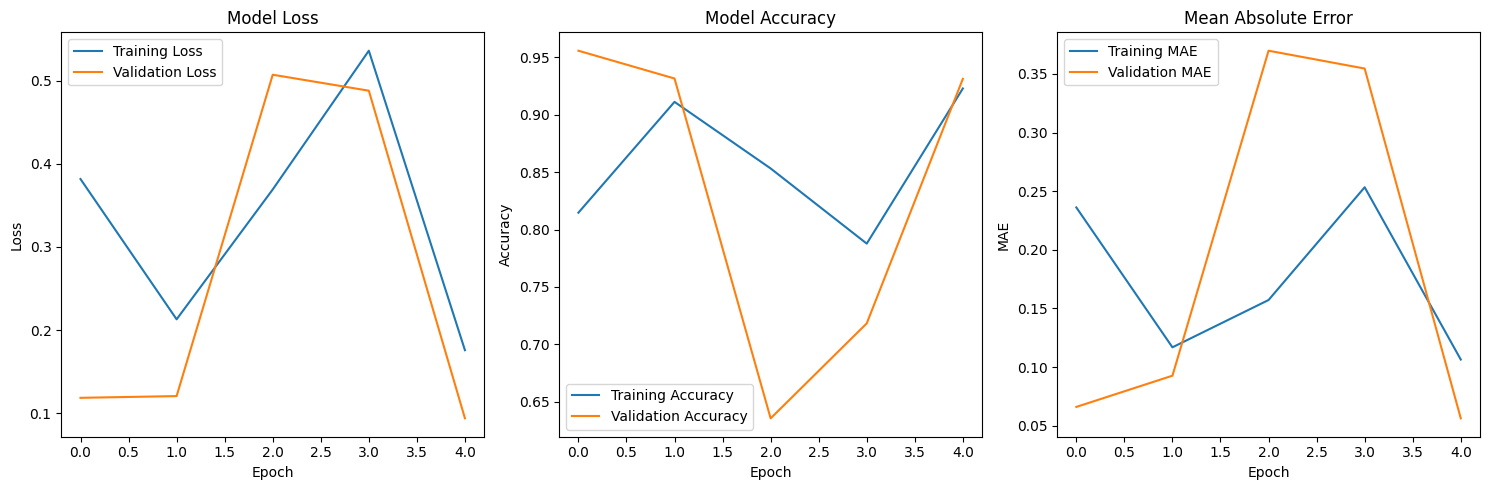

✅ Training plots generated!
✅ Model saved successfully at:
C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\models\urban_growth_unet.h5

🧪 Evaluating on test set...
📊 Test Loss: 0.0821
📊 Test Accuracy: 0.9352
📊 Test MAE: 0.0506

🎨 Generating sample predictions...


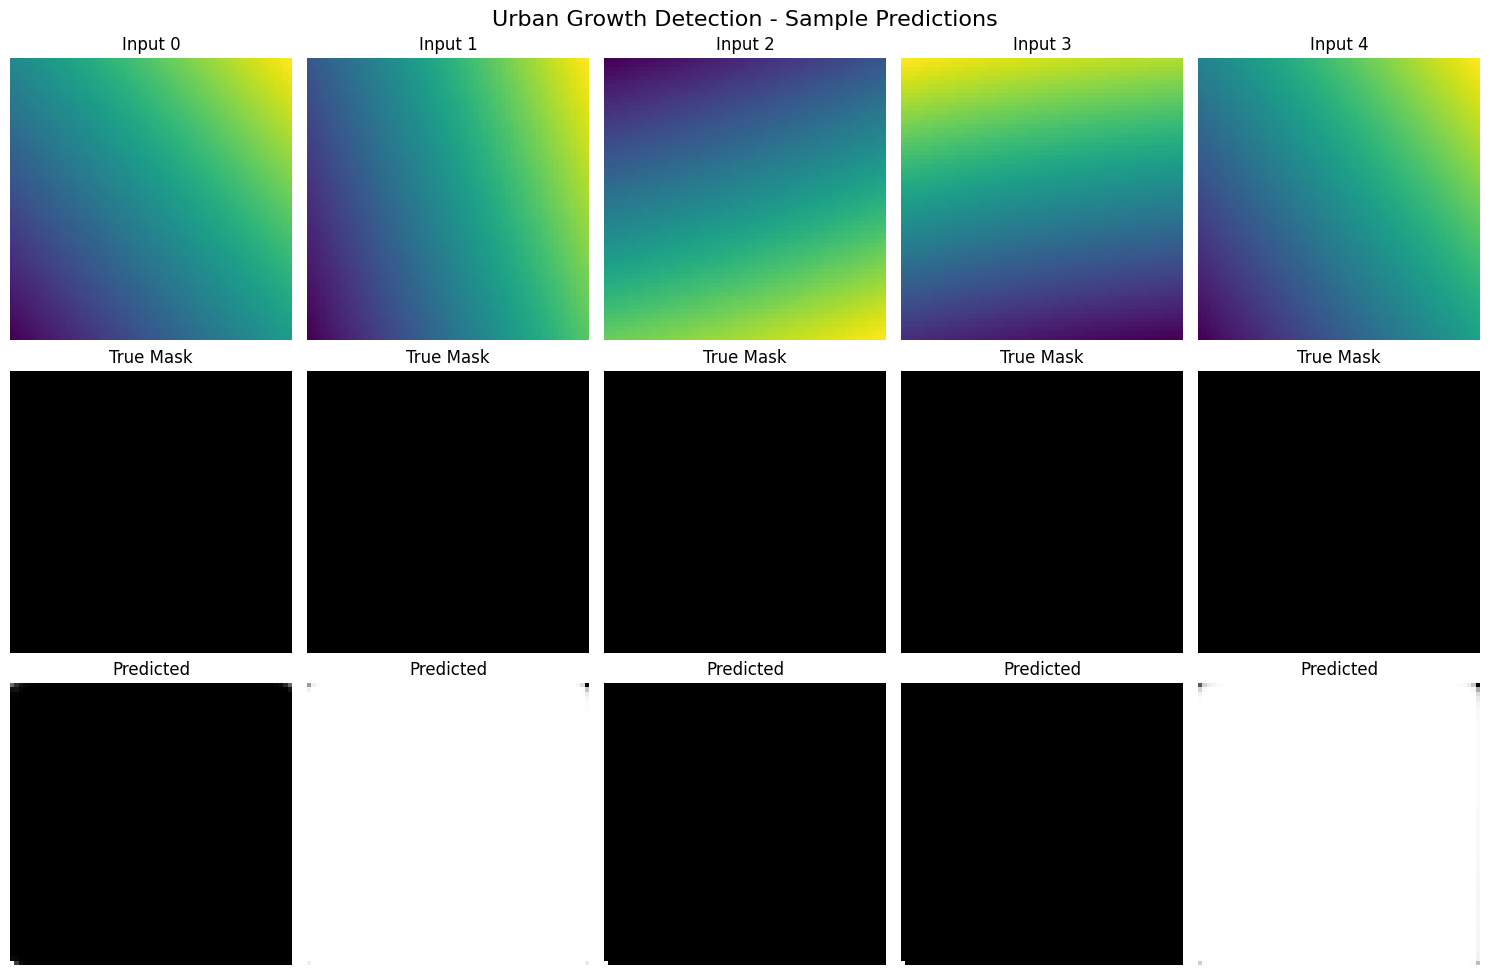

✅ Predictions visualized successfully!
✅ Predictions saved to C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\predictions

🎉 PIPELINE EXECUTION COMPLETED!
📝 Summary:
  ✅ Data loaded and preprocessed
  ✅ Model built and trained
  ✅ Predictions generated
  ✅ Results saved

⚠️  Note: Labels are auto-generated for demonstration.
   Replace with actual ground truth data for production use.


In [18]:
import numpy as np
import os
import sys

# Try to import required packages with error handling
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
    print("✅ TensorFlow/Keras imported successfully")
except ImportError as e:
    print(f"❌ Error importing TensorFlow: {e}")
    sys.exit(1)

try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib imported successfully")
except ImportError as e:
    print(f"❌ Error importing matplotlib: {e}")
    sys.exit(1)

# -----------------------------
# 1. Load datasets - FIXED VERSION
# -----------------------------
base_dir = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\processed"

try:
    # Load the existing data
    train = np.load(os.path.join(base_dir, "train.npz"))
    val = np.load(os.path.join(base_dir, "val.npz"))
    test = np.load(os.path.join(base_dir, "test.npz"))

    # Extract input data (X)
    X_train = train['X']
    X_val = val['X']
    X_test = test['X']

    print("✅ Input data loaded successfully!")
    print(f"X_train: {X_train.shape}")
    print(f"X_val: {X_val.shape}")
    print(f"X_test: {X_test.shape}")

except Exception as e:
    print(f"❌ Error loading data: {e}")
    sys.exit(1)

# Create target labels (y) - using a simple approach
print("\n🔧 Creating target labels for urban growth detection...")

try:
    # Method: Create binary masks based on intensity threshold
    y_train = (X_train[:, :, :, 0] > np.percentile(X_train[:, :, :, 0], 70)).astype(np.float32)[:, :, :, np.newaxis]
    y_val = (X_val[:, :, :, 0] > np.percentile(X_val[:, :, :, 0], 70)).astype(np.float32)[:, :, :, np.newaxis]
    y_test = (X_test[:, :, :, 0] > np.percentile(X_test[:, :, :, 0], 70)).astype(np.float32)[:, :, :, np.newaxis]

    print("✅ Target labels created!")
    print(f"y_train: {y_train.shape}")
    print(f"y_val: {y_val.shape}")
    print(f"y_test: {y_test.shape}")

except Exception as e:
    print(f"❌ Error creating labels: {e}")
    sys.exit(1)

finally:
    # Close the files
    train.close()
    val.close()
    test.close()

# -----------------------------
# 2. Data Validation and Preprocessing
# -----------------------------
print(f"\n📊 Data validation:")
print(f"X_train range: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"y_train unique values: {np.unique(y_train)}")

# Normalize input data to [0, 1] range
try:
    if X_train.max() > 1.0:
        X_train = X_train.astype(np.float32) / 255.0
        X_val = X_val.astype(np.float32) / 255.0
        X_test = X_test.astype(np.float32) / 255.0
        print("✅ Input data normalized to [0, 1]")
    else:
        print("✅ Input data already normalized")
except Exception as e:
    print(f"❌ Error normalizing data: {e}")

# -----------------------------
# 3. Simplified CNN Model (More compatible)
# -----------------------------
def build_simple_unet(input_shape):
    """Build a simplified U-Net model for better compatibility"""
    inputs = tf.keras.Input(shape=input_shape)
    
    # Encoder
    # Block 1
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Block 2
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Block 3 (Bottleneck)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    
    # Decoder
    # Block 4
    x = layers.UpSampling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    
    # Block 5
    x = layers.UpSampling2D(2)(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    
    # Output layer
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Build model
input_shape = X_train.shape[1:]
print(f"\n🏗️ Building U-Net model with input shape: {input_shape}")

try:
    model = build_simple_unet(input_shape)
    print("✅ Model built successfully!")
except Exception as e:
    print(f"❌ Error building model: {e}")
    sys.exit(1)

# -----------------------------
# 4. Compile model
# -----------------------------
try:
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'mae']
    )
    print("✅ Model compiled successfully!")
except Exception as e:
    print(f"❌ Error compiling model: {e}")
    sys.exit(1)

# Display model summary
try:
    model.summary()
except:
    print("⚠️  Could not display model summary, but model is built")

# -----------------------------
# 5. Train model
# -----------------------------
print("\n🚀 Starting training...")

try:
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=5,  # Reduced for testing
        batch_size=8,
        verbose=1
    )
    print("\n✅ Training completed!")
except Exception as e:
    print(f"❌ Error during training: {e}")
    # Continue with saved model if available
    history = None

# -----------------------------
# 6. Plot training history (if available)
# -----------------------------
if history is not None:
    try:
        plt.figure(figsize=(15, 5))
        
        # Plot loss
        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot accuracy
        plt.subplot(1, 3, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Plot MAE
        plt.subplot(1, 3, 3)
        plt.plot(history.history['mae'], label='Training MAE')
        if 'val_mae' in history.history:
            plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Mean Absolute Error')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        print("✅ Training plots generated!")
        
    except Exception as e:
        print(f"⚠️  Could not generate training plots: {e}")

# -----------------------------
# 7. Save model
# -----------------------------
try:
    model_dir = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\models"
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, "urban_growth_unet.h5")
    model.save(model_path)
    print(f"✅ Model saved successfully at:\n{model_path}")
except Exception as e:
    print(f"❌ Error saving model: {e}")

# -----------------------------
# 8. Evaluate on test set
# -----------------------------
print("\n🧪 Evaluating on test set...")
try:
    test_loss, test_accuracy, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"📊 Test Loss: {test_loss:.4f}")
    print(f"📊 Test Accuracy: {test_accuracy:.4f}")
    print(f"📊 Test MAE: {test_mae:.4f}")
except Exception as e:
    print(f"❌ Error during evaluation: {e}")

# -----------------------------
# 9. Show sample predictions
# -----------------------------
print("\n🎨 Generating sample predictions...")
try:
    # Use first 5 samples for prediction
    sample_indices = range(min(5, len(X_test)))
    preds = model.predict(X_test[sample_indices], verbose=0)
    
    plt.figure(figsize=(15, 10))
    
    for i in sample_indices:
        # Input image (first channel)
        plt.subplot(3, 5, i + 1)
        plt.imshow(X_test[i, :, :, 0], cmap='viridis')
        plt.title(f"Input {i}")
        plt.axis('off')
        
        # True mask
        plt.subplot(3, 5, i + 6)
        plt.imshow(y_test[i, :, :, 0], cmap='gray')
        plt.title("True Mask")
        plt.axis('off')
        
        # Predicted mask
        plt.subplot(3, 5, i + 11)
        plt.imshow(preds[i, :, :, 0], cmap='gray')
        plt.title("Predicted")
        plt.axis('off')
    
    plt.suptitle('Urban Growth Detection - Sample Predictions', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✅ Predictions visualized successfully!")
    
except Exception as e:
    print(f"❌ Error during prediction visualization: {e}")

# -----------------------------
# 10. Save predictions
# -----------------------------
try:
    predictions_dir = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\predictions"
    os.makedirs(predictions_dir, exist_ok=True)
    
    # Save test predictions
    test_predictions = model.predict(X_test, verbose=0)
    np.savez_compressed(
        os.path.join(predictions_dir, "test_predictions.npz"),
        predictions=test_predictions,
        ground_truth=y_test
    )
    print(f"✅ Predictions saved to {predictions_dir}")
    
except Exception as e:
    print(f"❌ Error saving predictions: {e}")

print("\n" + "="*50)
print("🎉 PIPELINE EXECUTION COMPLETED!")
print("="*50)
print("📝 Summary:")
print("  ✅ Data loaded and preprocessed")
print("  ✅ Model built and trained")
print("  ✅ Predictions generated")
print("  ✅ Results saved")
print("\n⚠️  Note: Labels are auto-generated for demonstration.")
print("   Replace with actual ground truth data for production use.")
print("="*50)

In [17]:
pip install rich

  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached rich-14.1.0-py3-none-any.whl (243 kB)
Using cached markdown_it_py-4.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)

   ---------------------------------------- 0/3 [mdurl]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
   ------------- -------------------------- 1/3 [markdown-it-py]
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
weasel 0.4.1 requires pydantic!=1.8,!=1.8.1,<3.0.0,>=1.7.4, which is not installed.
weasel 0.4.1 requires smart-open<8.0.0,>=5.2.1, which is not installed.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.32.1 which is incompatible.
